# Objective

* Making a Model on Fish Dataset by using Linear Regression

* Q1. Plot a bar chart showing count of individual species

* Q2. Identify outliers and remove if any

* Q3. Build a regression model and print regression equation

* Q4. Find the mean score of the model at 95% confidence interval

* Q5. Compare real and predicted weights and give a conclusion statement based on it.

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Import

In [2]:
fish = pd.read_csv(r"C:\Users\Dell\Desktop\Machine Learning\exam\Fish_dataset.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Data Type 

In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


 here we can see the datatype of every column

# Univariate Analysis

In [6]:
# Let's look at some statistical information about our dataframe.
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


here we analysis the mean median and mode of perticular dataset

* Q2. Identify outliers and remove if any

# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

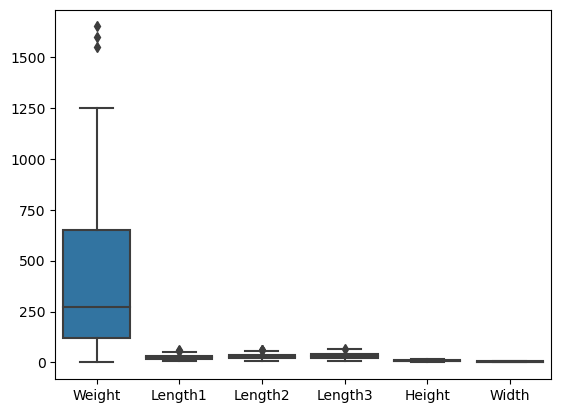

In [8]:
sns.boxplot(data=fish)

In [15]:
outlier = ['Weight','Length1',"Length2",'Length3','Height','Width']
for i in outlier:
    Q1 = fish[i].quantile(0.25)
    Q3 = fish[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    fish[i]=np.where(fish[i] > upper_limit,upper_limit,fish[i])
    fish[i]=np.where(fish[i] < lower_limit,lower_limit,fish[i])

<AxesSubplot:>

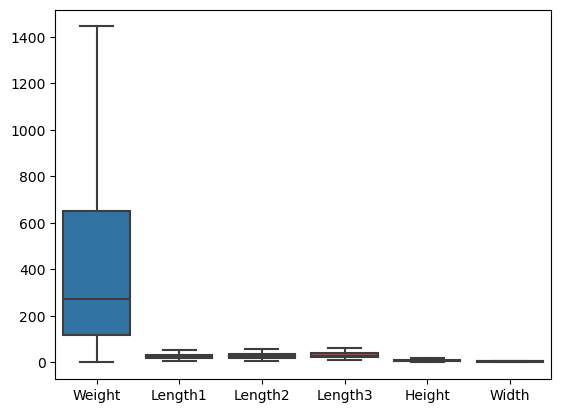

In [16]:
sns.boxplot(data=fish)

finally we change the outliers with upper limit and lower limit

#### Missing Value

In [18]:
fish.isna().sum()  # no missing data

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Text(0, 0.5, 'Frequency')

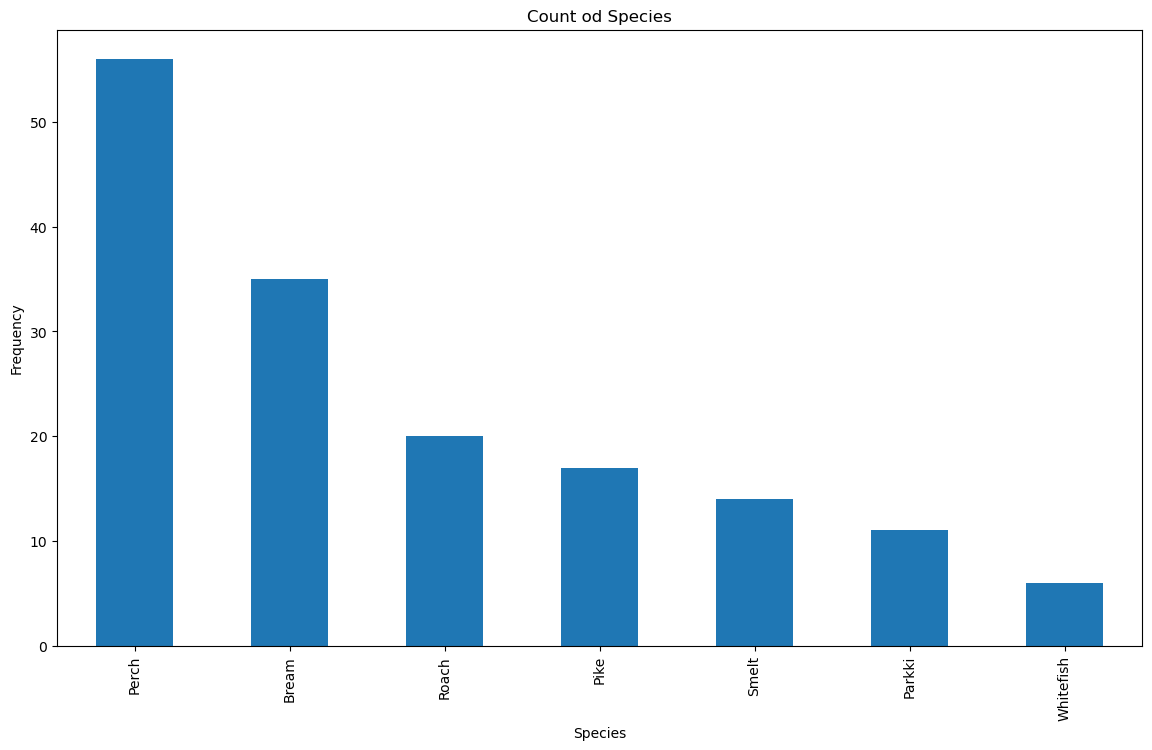

In [58]:
xy = fish['Species'].value_counts().plot(kind='bar', figsize=(14,8), title= "Count od Species")
                                        
xy.set_xlabel("Species")
xy.set_ylabel("Frequency")

In [60]:
# Quanitative Variable
Quantitative_Variable = fish[fish.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961


In [62]:
#Qualitative Variable
Qualitative_Variable = fish[fish.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Species
0,Bream
1,Bream
2,Bream


In [63]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [64]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [67]:
Final_combined.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [68]:
# Putting feature variable to X
X = Final_combined.drop('Weight', axis= 1)

# Putting response variable to y
y = Final_combined[['Weight']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=67)

In [69]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Weight,Species,Length1,Length2,Length3,Height,Width
51,180.0,4,23.6,25.2,27.9,7.0866,3.9060
3,363.0,0,26.3,29.0,33.5,12.7300,4.4555
133,345.0,3,36.0,38.5,41.0,6.3960,3.9770
103,260.0,2,25.4,27.5,28.9,7.1672,4.3350
123,1100.0,2,39.0,42.0,44.6,12.8002,6.8684


# Correlation Matrix

In [70]:
df.corr()

,Weight,Species,Length1,Length2,Length3,Height,Width
Weight,1.000000,-0.312609,0.908870,0.913044,0.923009,0.729114,0.882609
Species,-0.312609,1.000000,-0.272869,-0.289734,-0.330337,-0.691296,-0.400183
Length1,0.908870,-0.272869,1.000000,0.999515,0.992473,0.609953,0.856752
Length2,0.913044,-0.289734,0.999515,1.000000,0.994447,0.625662,0.864353
Length3,0.923009,-0.330337,0.992473,0.994447,1.000000,0.676953,0.863707
Height,0.729114,-0.691296,0.609953,0.625662,0.676953,1.000000,0.792840
Width,0.882609,-0.400183,0.856752,0.864353,0.863707,0.792840,1.000000


<AxesSubplot:>

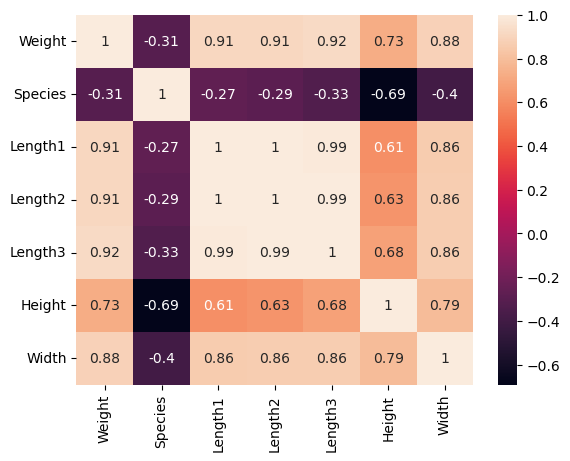

In [71]:
sns.heatmap(df.corr(),annot = True)

* by using correlation and heatmap we can say that there is multicolinearity

### Multicolinearity (with the help of VIF)

In [73]:
X1=df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Species        2.701984
Length1    14626.987999
Length2    19630.651366
Length3     2317.604763
Height        55.645287
Width        103.503685
dtype: float64

In [74]:
X1=df.drop(['Weight','Length2'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Species       2.630990
Length1    1741.440874
Length3    1767.297548
Height       54.769193
Width        85.118671
dtype: float64

In [75]:
X1=df.drop(['Weight','Length2','Length3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Species     2.574971
Length1    31.813708
Height     20.009222
Width      58.784866
dtype: float64

In [76]:
X1=df.drop(['Weight','Width','Length3','Length2'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Species     2.373571
Length1    13.667559
Height     10.049121
dtype: float64

In [77]:
X1=df.drop(['Weight','Species','Length2','Width','Length3'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    8.329817
Height     8.329817
dtype: float64

* so after using VIF we can say that Length1 and height have linear relationship with Length1 and Height

# Model Building

*  H0 :- There is no Linear relationship between weight and length1, height

* Vs 

*  H1 :- There is a Linear relationship between weight and length1, height

Alpha = 0.05 (5%)

In [78]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length1 + Height',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     376.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.97e-49
Time:                        13:07:50   Log-Likelihood:                -693.76
No. Observations:                 111   AIC:                             1394.
Df Residuals:                     108   BIC:                             1402.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.9604     35.349    -14.143      0.000    -570.029    -429.892
Length1       26.2143      1.525     17.194      0.000      23.192      29.236
Height        23.0485      3.560      6.473      0.000      15.991      30.106
==============================================================================
Omnibus:                        3.904   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.481
Skew:                           0.429   Prob(JB):                        0.175
Kurtosis:                       3.128   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between Weight and Lenght1 and Height
* 87.5% is accuracy of model , so we say model is good fit 

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [79]:
df.head()

,Weight,Species,Length1,Length2,Length3,Height,Width
51,180.0,4,23.6,25.2,27.9,7.0866,3.9060
3,363.0,0,26.3,29.0,33.5,12.7300,4.4555
133,345.0,3,36.0,38.5,41.0,6.3960,3.9770
103,260.0,2,25.4,27.5,28.9,7.1672,4.3350
123,1100.0,2,39.0,42.0,44.6,12.8002,6.8684


In [80]:
# Y = intercet + b1 * Length1 + b2 * Height
Y = -499.9604 + 26.2143 * 23.6 + 23.0485 * 7.0866
Y

282.0325801000001

In [81]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,Weight,Species,Length1,Length2,Length3,Height,Width,fitted_value,residual
51,180.0,4,23.6,25.2,27.9,7.0866,3.9060,282.031530,-102.031530
3,363.0,0,26.3,29.0,33.5,12.7300,4.4555,482.881844,-119.881844
133,345.0,3,36.0,38.5,41.0,6.3960,3.9770,591.171098,-246.171098
103,260.0,2,25.4,27.5,28.9,7.1672,4.3350,331.074909,-71.074909
123,1100.0,2,39.0,42.0,44.6,12.8002,6.8684,817.420976,282.579024


# Linearity

<AxesSubplot:title={'center':'weight vs length1'}, xlabel='Length1', ylabel='Weight'>

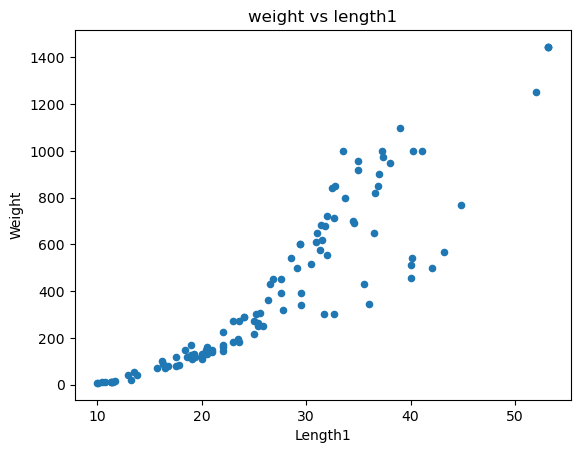

In [83]:
df.plot.scatter(x='Length1', y='Weight', title='weight vs length1')

<AxesSubplot:title={'center':'weight vs height'}, xlabel='Height', ylabel='Weight'>

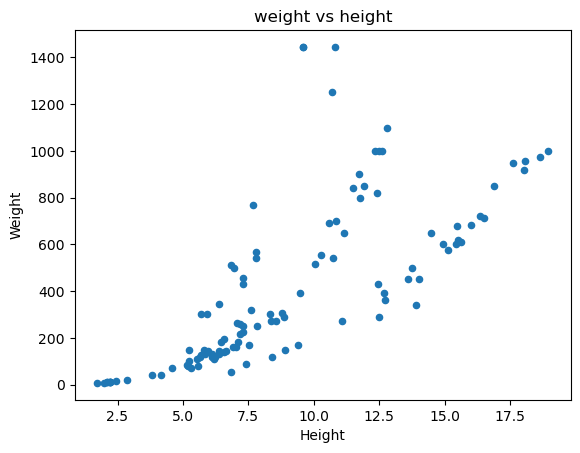

In [84]:
df.plot.scatter(x='Height', y='Weight', title='weight vs height')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

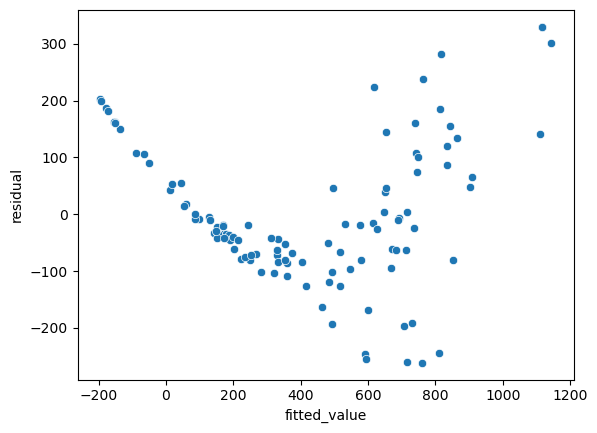

In [85]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

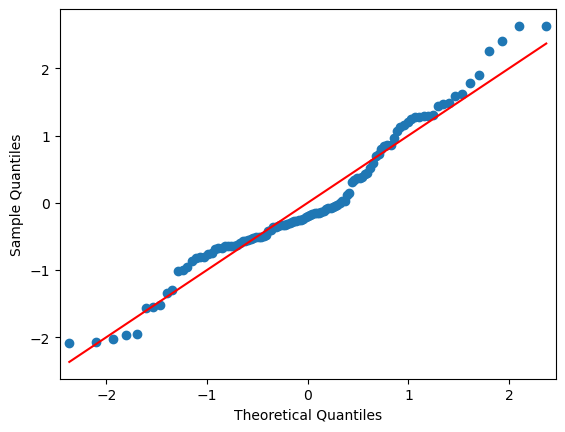

In [86]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

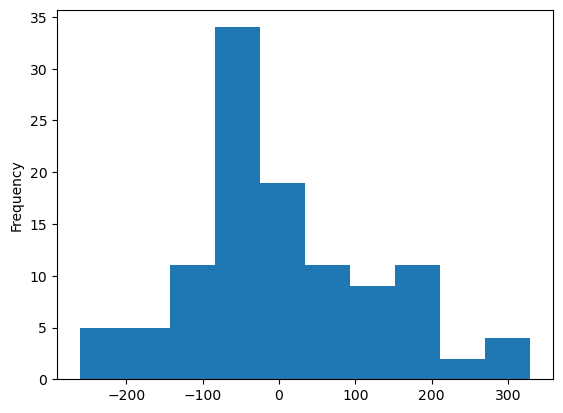

In [87]:
df['residual'].plot.hist()

* We can say that all the assumption are true

# Prediction on Test Data (unseen data)

In [88]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
86,2,20.0,22.0,23.5,6.1100,3.4075,120.0
116,2,36.5,39.0,41.4,11.1366,7.4934,900.0
79,2,17.2,19.0,20.2,5.6358,3.0502,80.0
140,3,48.3,51.7,55.1,8.9262,6.1712,950.0
71,1,24.0,26.0,29.0,11.3680,4.2340,300.0


In [89]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Species,Length1,Length2,Length3,Height,Width,Weight,Prediction
86,2,20.0,22.0,23.5,6.1100,3.4075,120.0,165.151038
116,2,36.5,39.0,41.4,11.1366,7.4934,900.0,713.541865
79,2,17.2,19.0,20.2,5.6358,3.0502,80.0,80.821514
140,3,48.3,51.7,55.1,8.9262,6.1712,950.0,971.923792
71,1,24.0,26.0,29.0,11.3680,4.2340,300.0,391.197008


In [90]:
# Y = intercet + b1 * Length1 + b2 * Height
Y = -499.9604 + 26.2143 * 20 + 23.0485 * 6.1100
Y

165.15193500000007

# Test

In [91]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.Weight, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.87


# Train

In [93]:
from sklearn.metrics import r2_score
r2 = r2_score(df.Weight, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.87


* Test data is good fit with 87% Accuracy
* Train data is also good fit with 87% Accuracy
* Model is good fit on Train dataset  & Performance of model on Test data is also good fit

In [100]:
df[["Weight","fitted_value"]]

,Weight,fitted_value
51,180.0,282.031530
3,363.0,482.881844
133,345.0,591.171098
103,260.0,331.074909
123,1100.0,817.420976
...,...,...
91,130.0,172.403854
137,500.0,761.456015
7,390.0,515.577475
53,272.0,352.875519


# Conclusion

* initially we remove the outliers and made a barplot 
* here we can conclude that the accuracy of our model is 87% good fit so our model is good fit
* here we can say that we reject hte null hypothesys(H0) and there is a linear relationship between weight and lenght and height
* there is a linear relationship in this Model 
* so we can say that as fish weight increase the price will also increase